In [1]:
import pandas as pd

# Load the CSV
# Load and prepare the dataset
df = pd.read_csv("daily_sales_data.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

print(df.head())


            Sales
Date             
2024-01-01    202
2024-01-02    448
2024-01-03    370
2024-01-04    206
2024-01-05    171


2.Visualize Sales Trends Over Time

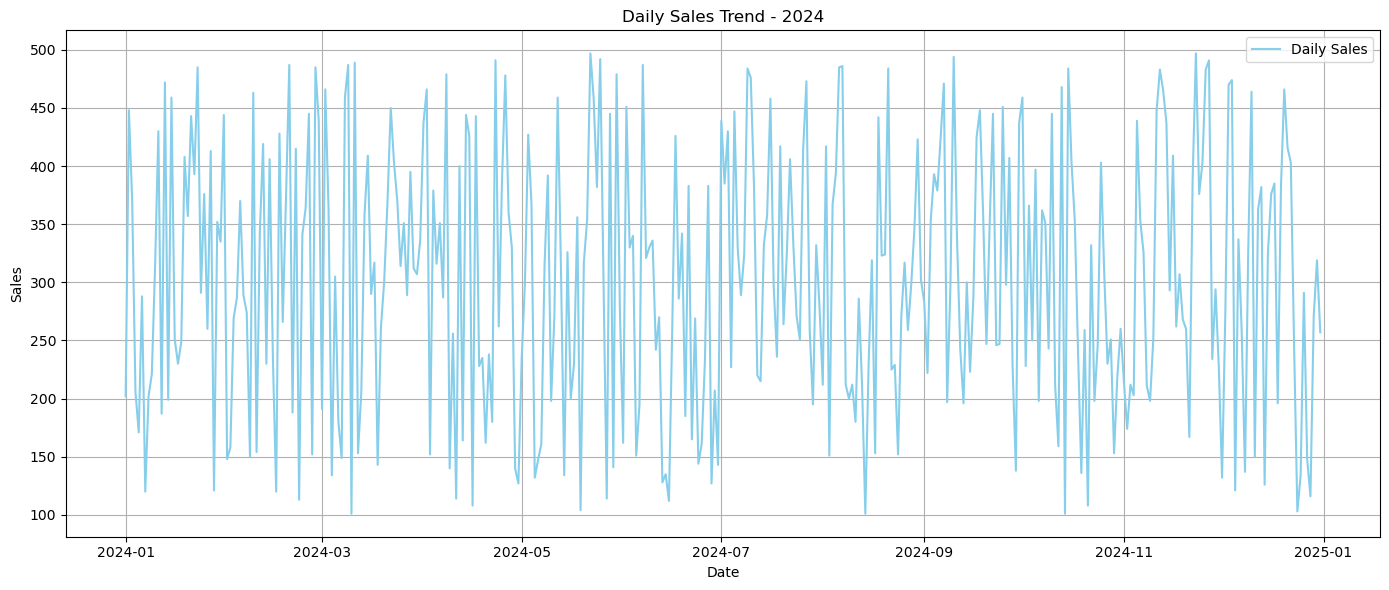

In [ ]:
#plots sales data to identify patterns such as seasonality, trends, or irregularities.

import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv("daily_sales_data.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Plot the sales data
plt.figure(figsize=(14, 6))
plt.plot(df['Sales'], label='Daily Sales', color='skyblue')
plt.title('Daily Sales Trend - 2024')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


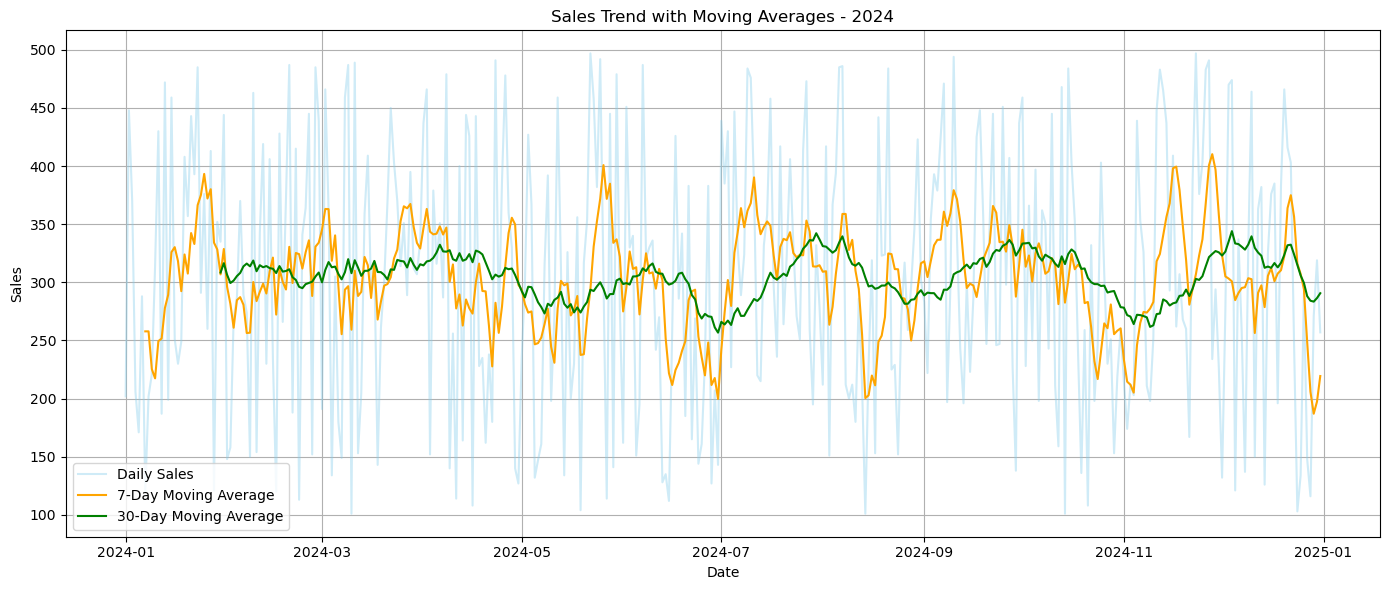

In [ ]:
#Use line charts or moving averages to observe fluctuations
# Calculate moving averages
df['7-day MA'] = df['Sales'].rolling(window=7).mean()
df['30-day MA'] = df['Sales'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Sales'], label='Daily Sales', color='skyblue', alpha=0.4)
plt.plot(df['7-day MA'], label='7-Day Moving Average', color='orange')
plt.plot(df['30-day MA'], label='30-Day Moving Average', color='green')
plt.title('Sales Trend with Moving Averages - 2024')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# Calculate moving averages
df['7-day MA'] = df['Sales'].rolling(window=7).mean()
df['30-day MA'] = df['Sales'].rolling(window=30).mean()

3.Use ARIMA for Forecasting


In [ ]:
#Apply AutoRegressive Integrated Moving Average (ARIMA) to model the sales data.

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -18.613357961286635
p-value: 2.064228395675341e-30


In [8]:

# Explicitly set daily frequency
df = df.asfreq('D')  # 'D' stands for daily


from pmdarima import auto_arima

auto_model = auto_arima(df['Sales'], seasonal=False, trace=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5270.381, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4718.862, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5037.314, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4624.813, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4592.193, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4587.723, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4576.261, Time=0.17 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=4498.048, Time=0.22 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4496.592, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4499.439, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4498.545, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4501.4

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Use suggested (p,d,q) from auto_arima
model = ARIMA(df['Sales'], order=(1,1,1))  # Example, update with actual result
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2242.498
Date:                Mon, 28 Jul 2025   AIC                           4490.997
Time:                        12:54:53   BIC                           4502.696
Sample:                    01-01-2024   HQIC                          4495.646
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0272      0.052      0.519      0.604      -0.076       0.130
ma.L1         -1.0000      2.690     -0.372      0.710      -6.272       4.272
sigma2      1.251e+04   3.37e+04      0.371      0.7

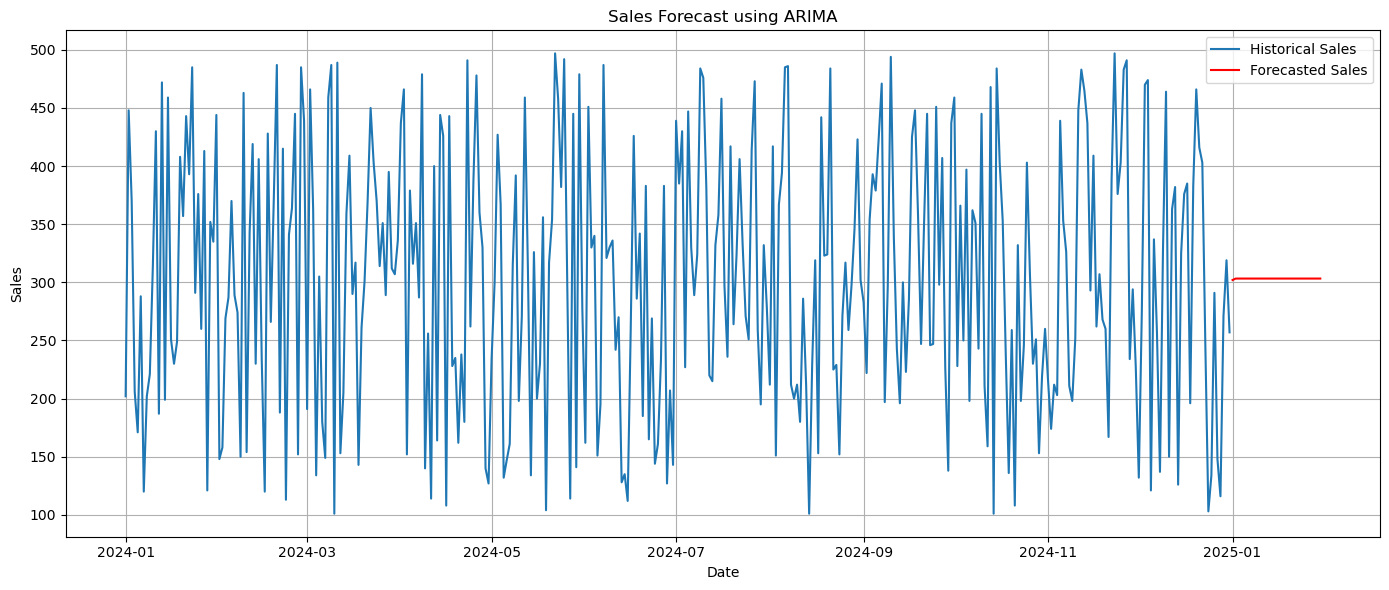

In [ ]:
#Train the model and generate sales forecasts for future periods.

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Create forecast index
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Make forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast}, index=future_dates)

# Plot actual and forecast
plt.figure(figsize=(14, 6))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(forecast_df['Forecast'], label='Forecasted Sales', color='red')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Validate the accuracy of the model using metrics like RMSE or MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

train = df['Sales'][:-30]
test = df['Sales'][-30:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
pred = model_fit.forecast(steps=30)

rmse = np.sqrt(mean_squared_error(test, pred))
mape = mean_absolute_percentage_error(test, pred) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 119.45
MAPE: 52.27%


In [ ]:
#Forecasted Sales Values
import pandas as pd

# Forecast 30 future days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create future date index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Create DataFrame of forecasted values
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Sales': forecast})
forecast_df.set_index('Date', inplace=True)

# Display the forecasted sales
print(forecast_df.head())


            Forecasted Sales
Date                        
2025-01-01        301.814278
2025-01-02        304.365527
2025-01-03        304.403856
2025-01-04        304.404432
2025-01-05        304.404441


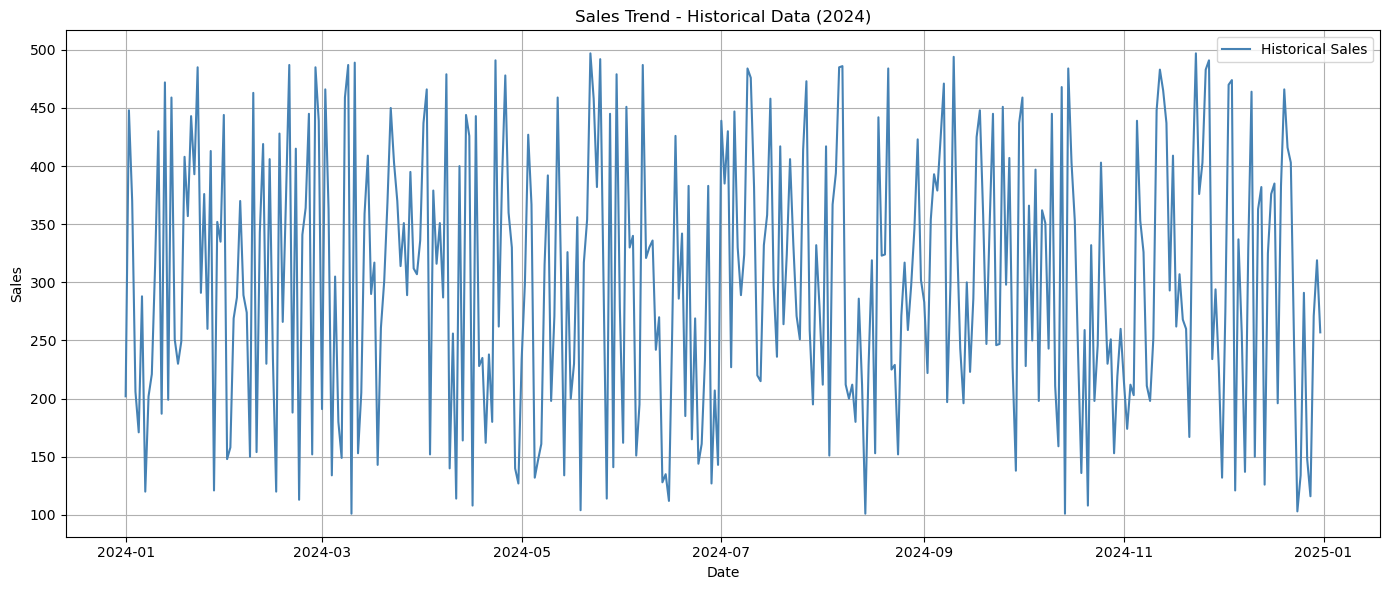

In [ ]:
#A trend analysis plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Sales'], label='Historical Sales', color='steelblue')
plt.title('Sales Trend - Historical Data (2024)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


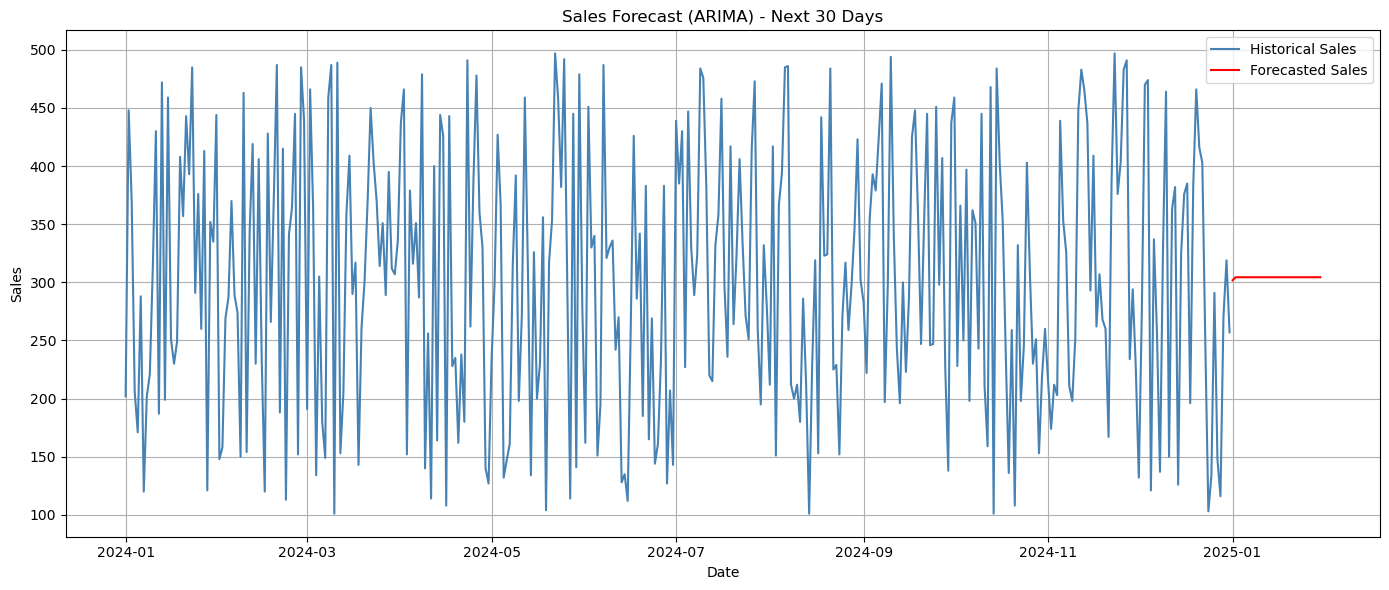

: 

In [ ]:
# Combine past and forecast for visualization
combined = pd.concat([df['Sales'], forecast_df['Forecasted Sales']])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Sales'], label='Historical Sales', color='steelblue')
plt.plot(forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')
plt.title('Sales Forecast (ARIMA) - Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
